In [55]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
from scipy import stats
import statistics

In [5]:
scoreTableDf = pd.read_csv("random_cog_scores.tsv", header=None, sep='\t')
scoreTableDf

,0,1,2,3,4,5
0,6,5.57,YP_009325831.1,YP_009950968.1,47.0,70.0
1,5,4.640000000000001,YP_009838200.1,YP_010060169.1,42.0,42.0
2,9,8.419999999999998,YP_006383024.1,YP_009277225.1,216.0,32.0
3,8,7.4799999999999995,ARF09586.1,YP_009904380.1,115.0,76.0
4,8,7.529999999999999,YP_009806319.1,YP_009207280.1,69.0,78.0
...,...,...,...,...,...,...
478511,13,12.500000000000002,YP_006989225.1,YP_009859465.1,175.0,102.0
478512,8,7.46,AEQ33033.1,YP_007676059.1,412.0,208.0
478513,5,4.6899999999999995,YP_010091984.1,YP_009273236.1,86.0,306.0
478514,8,7.479999999999999,YP_009006590.1,YP_009613864.1,80.0,67.0


In [176]:
scores = scoreTableDf[0]
scores = [int(score) for score in scores if score.isnumeric()] # Filter out bad rows
scores[:10]

[6, 5, 9, 8, 8, 11, 8, 9, 10, 8]

In [177]:
random.sample(list(scores), 10)

[8, 6, 9, 7, 8, 5, 14, 4, 9, 5]

In [178]:
def SampleExtremeValue(distr, n):
    return max(random.sample(distr, n))

SampleExtremeValue(list(scores), 10000)

112

In [179]:
#n is subsample size, m is number of populations to sample
# THIS ISN"T ACTUALLY USEFUL
def MeanExtremeValue(distr, n, m):
    return sum([SampleExtremeValue(distr, n) for i in range(m)])/m
MeanExtremeValue(list(scores), 10000, 100)

55.38

In [180]:
logss = np.arange(1.0, math.log(10000, 10) + 1, 0.5)
samplesizes = [int(10**logn) for logn in logss]
samplesizes

[10, 31, 100, 316, 1000, 3162, 10000, 31622]

In [181]:
simulation_count = 1000

scores = list(scores)
evs = np.array([[SampleExtremeValue(scores, n) for i in range(simulation_count)] for n in samplesizes])
evs[:, 0:10]

array([[ 11,   9,  12,  13,  12,   8,  12,  10,  12,  13],
       [ 14,  12,  12,  13,  14,  31,  14,  16,  13,  13],
       [ 14,  15,  13,  16,  15,  16,  24,  26,  15,  16],
       [ 16,  14,  16,  17,  19,  18,  19,  17,  18,  15],
       [ 37,  28,  21,  17,  21,  22,  58,  18,  19,  33],
       [ 37,  23,  23,  32,  26,  20,  34,  46,  35, 106],
       [ 39,  32,  32,  38,  40,  31,  30,  41,  58, 126],
       [ 54,  36,  91,  62,  82,  50,  43,  91,  71,  69]])

In [182]:
kde = stats.gaussian_kde(scores, bw_method=0.5)
mean = statistics.mean(scores)
stddev = statistics.stdev(scores)

ev_kdes = [stats.gaussian_kde(ev, bw_method=0.5) for ev in evs]
ev_means = [statistics.mean(ev) for ev in evs]
ev_stddevs = [statistics.stdev(ev) for ev in evs]

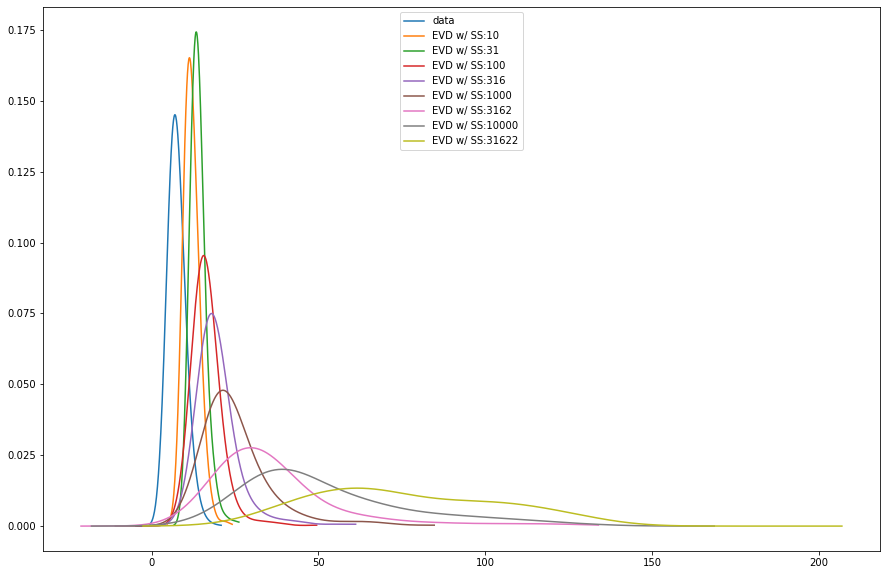

In [183]:
def PlotKDE(kde, mean, stddev, label):
    x_axis = np.arange(mean - 3*stddev, mean + 5*stddev, 0.1)
    y_axis = kde.pdf(x_axis)
    plt.plot(x_axis, y_axis, label=label)
    
plt.rcParams["figure.figsize"] = (15,10)

# Plot the original distribution
PlotKDE(kde, mean, stddev, "data")

# Plot the EVDs with different sample size
for i in range(len(evs)):
    PlotKDE(ev_kdes[i], ev_means[i], ev_stddevs[i], f"EVD w/ SS:{samplesizes[i]}")
    
plt.legend(loc='upper center')
plt.show()

In [184]:
scores = [30, 60, 120]
#pdfs = [kde.pdf(score) for kde in ev_kdes]
evalues = [[1.0-kde.integrate_box_1d(-10, score) for kde in ev_kdes] for score in scores]
evalues

[[0.0029987429088508266,
  0.0037887012183579483,
  0.026598289341101866,
  0.07774443794776142,
  0.24928032624927654,
  0.5786401532519012,
  0.8159859708522643,
  0.9632139272818263],
 [-4.440892098500626e-16,
  -4.440892098500626e-16,
  0.004989246172432682,
  0.011624962137252837,
  0.030501512303610534,
  0.10807524479368924,
  0.3045656791450828,
  0.6739753390918217],
 [-4.440892098500626e-16,
  -4.440892098500626e-16,
  1.7501699534072657e-08,
  1.2111245339951893e-10,
  0.0009525365835336697,
  0.010636115021707249,
  0.019605542611018323,
  0.08642952102701495]]

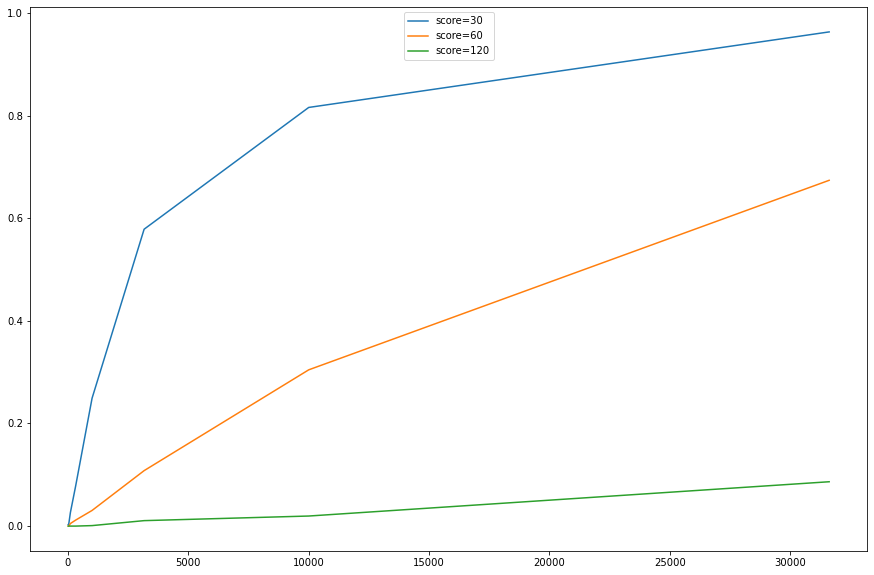

In [185]:
for i in range(len(scores)):
    plt.plot(samplesizes, evalues[i], label=f"score={scores[i]}")
plt.legend(loc='upper center')
plt.show()